In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
train = pd.read_csv('train.csv')
train_labels = pd.read_csv('train_labels.csv')
test = pd.read_csv('test.csv')

The first step we want to do is read in all of our data and preprare our packages

Were first going to do some very basic feature engineering on our train data set. Since I havent previously dealt with time stamps I've decided to reformat that data into something I'm more familiar with

In [2]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['date'] = train['timestamp'].dt.date
train['hour'] = train['timestamp'].dt.hour
train['weekday_name'] = train['timestamp'].dt.weekday_name

The first data set we want to take a look at is the train data set. However, because creating visualizations with such a large amount of data would take a lot of computing time, we will be using a sample of 10000 rows.

In [3]:
train_sample = train.sample(10000)

In [4]:
train_sample.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name
6252045,27253bdc,b44a300574009304,2019-10-11 14:01:54.615,"{""event_code"": 2000, ""event_count"": 1}",8a896f35,1,2000,0,Crystal Caves - Level 3,Clip,CRYSTALCAVES,2019-10-11,14,Friday
126902,71fe8f75,75f48864b6747b7a,2019-09-11 18:35:12.964,"{""description"":""One!"",""identifier"":""sid_1"",""me...",02cc511e,241,3110,145010,Bug Measurer (Activity),Activity,TREETOPCITY,2019-09-11,18,Wednesday
9539910,d3f1e122,a8405a42b22680f0,2019-10-05 21:42:41.371,"{""bottle"":{""amount"":1,""color"":""green""},""coordi...",d4db7ff5,133,4035,150393,Bottle Filler (Activity),Activity,MAGMAPEAK,2019-10-05,21,Saturday
2361762,a0faea5d,34b90b4cfea858d2,2019-09-28 14:17:43.414,"{""coordinates"":{""x"":39,""y"":516,""stage_width"":1...",343f56f4,304,4070,688067,Bubble Bath,Game,MAGMAPEAK,2019-09-28,14,Saturday
2621104,73757a5e,8329aa10fd3a6e23,2019-09-08 15:12:29.971,"{""description"":""Everybody has just the right a...",3a1ab046,131,3021,71434,Scrub-A-Dub,Game,MAGMAPEAK,2019-09-08,15,Sunday


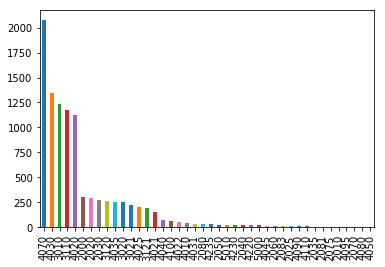

In [5]:
train_sample.event_code.value_counts().plot.bar()

We note that the most popular event codes are 4070, 4030, and 3010

Since our goal is to predict assessment scores for installation ids, we should look at what percentage of installs, actually go on to even attempt an assessment

In [6]:
print('num of installation IDS: ', (len(train_sample.installation_id.unique())))
print('num of installs that attempted assessment ', train_sample.groupby('installation_id').type.value_counts().unstack().Assessment.count())
percent = train_sample.groupby('installation_id').type.value_counts().unstack().Assessment.count() / len(train_sample.installation_id.unique())
print('percentage ', percent )

num of installation IDS:  4427
num of installs that attempted assessment  604
percentage  0.1364355093742941


just 15% of our sample of installation ids ever attempt an assessment

One feature we created earlier was days of the week. Lets see if children are more likely to play on different days.

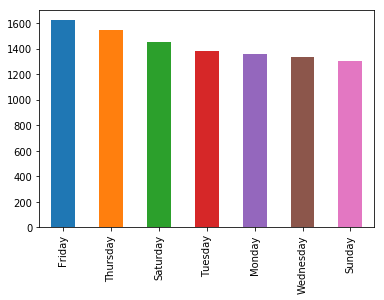

In [7]:
train_sample.weekday_name.value_counts().plot.bar()

It appears Friday and Thursday are the most popular days for the app. However, all days are relatively similiar.

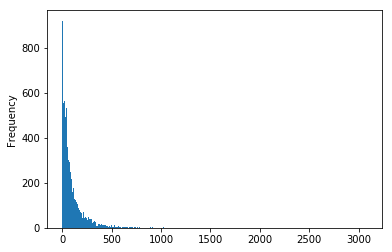

In [8]:
train_sample.event_count.plot.hist(bins=500)

Looking at the distribution of event count, we can see that its strongly skewed right with the vase majority close to 0.
Interestingly, we see several values over 500. Its fair to wonder is this an error, or are there really children playing this much of the measure up app.

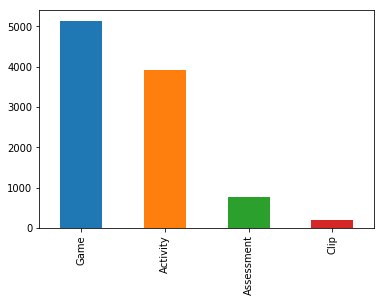

In [9]:
train_sample.type.value_counts().plot.bar()

Among the sample, games are the most popular event type. there could be several reasons for this. Its possible that users do play more games then they participate with activitys or assesments, but its also possible that interacting with a game simply creates more events.

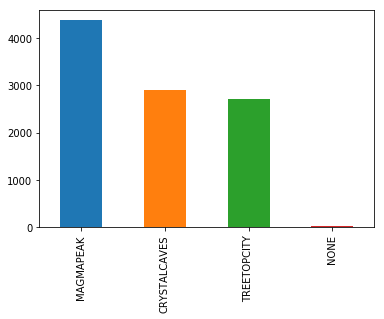

In [10]:
train_sample.world.value_counts().plot.bar()

The next data set we should look into is the test data set. It's important to see how this data set compares to the training dataset.

In [11]:
test.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [12]:
print('num of installation IDS: ', (len(test.installation_id.unique())))
print('num of installs that attempted assessment ', test.groupby('installation_id').type.value_counts().unstack().Assessment.count())
percent = test.groupby('installation_id').type.value_counts().unstack().Assessment.count() / len(test.installation_id.unique())
print('percentage ', percent )

num of installation IDS:  1000
num of installs that attempted assessment  1000
percentage  1.0


As you can see, unlike the training set, the test set has no installation ids that never took an assessment. This will be important to keep in mind later on.

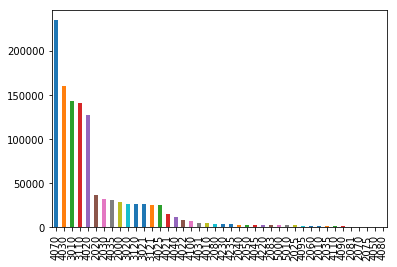

In [13]:
test.event_code.value_counts().plot.bar()

The graph of event code for the test data looks almost identitical to the train data.

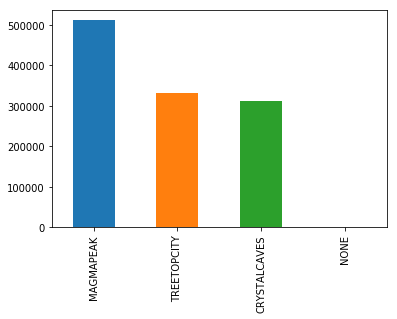

In [14]:
test.world.value_counts().plot.bar()

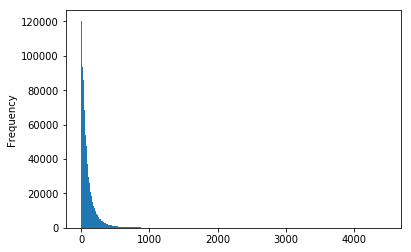

In [15]:
test.event_count.plot.hist(bins=500)

The distributions of both event count and world look very similiar to train data sets.

finally we will take a quick look at the train labels data

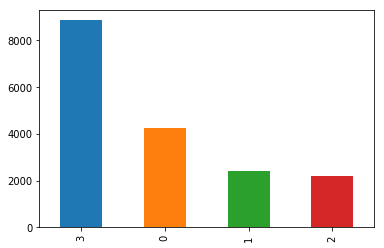

In [16]:
train_labels.accuracy_group.value_counts().plot.bar()

In [17]:
train_labels.installation_id.nunique()

3614

We see that 3 is the most common accuracy score, occuring almost 50% of the time. We also want to note that there are 3614 unique installation ids in the train labels set. Many installation ids have assessment scores for multiple different assessments and game sessions.

I am going to continue to explore the data, but now I am going to do so within the context of the problem.

Some very important information was given to us by PBS. Firstly its important to know that assessments attempts are marked with and event code of either 4100, or 4110.

We should also take note that the user begining any type of event is marked with an event code of 2000.

Were are asked to predict for each installation ID, What their final assessment score is going to be.
To do this we want to use all of the installation IDs play history up until the assesment to predict is begun.

We can see that for any individual installation ID, the last row of Test DF is always an assesment with event code 200.
We will try to get our training data into a similar working format.

To walk through the problem were addressing its easiest to look at a single installation id.

In [18]:
single_id = train[train.installation_id == '85697782']
single_id = single_id.sort_values('timestamp')
single_id['lastPlay_time'] = single_id['timestamp'].shift(periods=1)
single_id['time_since_lastPlay'] =( single_id['timestamp'] - single_id['lastPlay_time'])
single_id['time_since_lastPlay'] = single_id['time_since_lastPlay']/np.timedelta64(1, 's')

We have taken all of the play data for a single installation ID and put it into a data frame of its own. Then we went on to do some simple feature engineering to get the amount of time elapsed since this user last played the game. I beleive this data may be useful as children tend to forget things they learned a while back.

As stated above we want to use the history prior to the beginning of the final assessment attempted, to make a prediction for that final assessment.

So, lets find where the beginning of the final assessment is, take all the data prior to the point and make that our X.
We then want to go into training labels and find the true assessment group for that assesment, and make it our Y.

In [19]:
single_id.reset_index(inplace=True)
assessment_begins = single_id[(single_id['type'] == 'Assessment') & (single_id['event_code'] == 2000)]
assessments_with_attempts = assessment_begins[assessment_begins.game_session.isin(train_labels.game_session.unique())]
cut_off_idx = assessments_with_attempts.tail(1).index
single_id.iloc[cut_off_idx[0]]

index                                                            6012423
event_id                                                        90d848e0
game_session                                            b74ddc8c115f9857
timestamp                                     2019-08-23 14:25:09.357000
event_data             {"version":"1.0","event_count":1,"game_time":0...
installation_id                                                 85697782
event_count                                                            1
event_code                                                          2000
game_time                                                              0
title                                       Cauldron Filler (Assessment)
type                                                          Assessment
world                                                          MAGMAPEAK
date                                                          2019-08-23
hour                                               

In [27]:
X = single_id.iloc[:cut_off_idx[0] + 1]
display(X.head(1))
print()
display(X.tail(1))

,index,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name,lastPlay_time,time_since_lastPlay
0,6007696,15ba1109,7291f93554c20c01,2019-08-14 18:06:47.927,"{""version"":""1"",""round"":0,""event_count"":1,""game...",85697782,1,2000,0,Air Show,Game,TREETOPCITY,2019-08-14,18,Wednesday,NaT,NaN


,index,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name,lastPlay_time,time_since_lastPlay
4727,6012423,90d848e0,b74ddc8c115f9857,2019-08-23 14:25:09.357,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",85697782,1,2000,0,Cauldron Filler (Assessment),Assessment,MAGMAPEAK,2019-08-23,14,Friday,2019-08-23 14:24:47.871,21.486


As you can see, our X is now in the same form for a single installation ID as the test set.

In [21]:
labels_install = train_labels[train_labels['installation_id'] == '85697782']
Y = labels_install[labels_install.game_session == single_id.iloc[cut_off_idx[0]].game_session]
Y

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
9529,b74ddc8c115f9857,85697782,Cauldron Filler (Assessment),1,2,0.333333,1


To find our Y we simply needed to go into the train labels and find the row representing the data that corresponds to the assessment were trying to predict for.

If your wondering how train labels calculates accuracy, we can look at the corresponding assessment attempts from the train data

In [28]:
single_id[(single_id['type'] == 'Assessment') & (single_id.event_code.isin([4100, 4110])) & (single_id['game_session'] == 'b74ddc8c115f9857')]

,index,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name,lastPlay_time,time_since_lastPlay
4743,6012439,392e14df,b74ddc8c115f9857,2019-08-23 14:25:26.542,"{""buckets"":[0,0,0],""correct"":false,""buckets_pl...",85697782,17,4100,17364,Cauldron Filler (Assessment),Assessment,MAGMAPEAK,2019-08-23,14,Friday,2019-08-23 14:25:25.125,1.417
4753,6012449,392e14df,b74ddc8c115f9857,2019-08-23 14:25:33.954,"{""buckets"":[0,0,0],""correct"":false,""buckets_pl...",85697782,27,4100,24787,Cauldron Filler (Assessment),Assessment,MAGMAPEAK,2019-08-23,14,Friday,2019-08-23 14:25:32.720,1.234
4762,6012458,392e14df,b74ddc8c115f9857,2019-08-23 14:25:40.359,"{""buckets"":[0,0,0],""correct"":true,""buckets_pla...",85697782,36,4100,31196,Cauldron Filler (Assessment),Assessment,MAGMAPEAK,2019-08-23,14,Friday,2019-08-23 14:25:38.759,1.600


There are 3 attempts here. To check if an attempt is succesful or not, you look at the event Data and check if correct: -> True.
Here the user fails the first 2 attempts at the Cauldron filler and succesfully completes the assessment on their third.

In [32]:
X.dtypes

index                           int64
event_id                       object
game_session                   object
timestamp              datetime64[ns]
event_data                     object
installation_id                object
event_count                     int64
event_code                      int64
game_time                       int64
title                          object
type                           object
world                          object
date                           object
hour                            int64
weekday_name                   object
lastPlay_time          datetime64[ns]
time_since_lastPlay           float64
dtype: object

In [52]:
toAppend = pd.DataFrame({'installation_id' : [X.iloc[0].installation_id]})
toAppend['event_count'] = X.event_count.mean()
toAppend['event_code'] = X.event_code.mean()
toAppend['hour'] = X.hour.mean()
toAppend['time_since_lastPlay'] = X.time_since_lastPlay.mean()
toAppend['game_time'] = X.game_time.mean()
toAppend['accuracy_group'] = Y.iloc[0].accuracy_group

In [53]:
baselinetrain

,installation_id,event_count,event_code,hour,time_since_lastPlay,game_time,accuracy_group
0,85697782,97.560914,3487.811337,17.52813,161.688477,125851.571912,1


In [73]:
installs = train_labels.installation_id.unique()
len(installs)

3614

In [159]:
installs = train_labels.installation_id.unique()
train_installs = train.installation_id.unique()

baselineTrain = pd.DataFrame()
installs = installs[:100]
for install in installs:
    if install in train_installs:
        
        single_id = train[train.installation_id == install]
        single_id = single_id.sort_values('timestamp')
        single_id['lastPlay_time'] = single_id['timestamp'].shift(periods=1)
        single_id['time_since_lastPlay'] =( single_id['timestamp'] - single_id['lastPlay_time'])
        single_id['time_since_lastPlay'] = single_id['time_since_lastPlay']/np.timedelta64(1, 's')

        single_id.reset_index(inplace=True)
        assessment_begins = single_id[(single_id['type'] == 'Assessment') & (single_id['event_code'] == 2000)]
        assessments_with_attempts = assessment_begins[assessment_begins.game_session.isin(train_labels.game_session.unique())]
        cut_off_idx = assessments_with_attempts.tail(1).index

        X = single_id.iloc[:cut_off_idx[0] + 1]


        labels_install = train_labels[train_labels['installation_id'] == install]
        Y = labels_install[labels_install.game_session == single_id.iloc[cut_off_idx[0]].game_session]

        toAppend = pd.DataFrame({'installation_id' : [X.iloc[0].installation_id]})
        toAppend['event_count'] = X.event_count.mean()
        toAppend['event_code'] = X.event_code.mean()
        toAppend['hour'] = X.hour.mean()
        toAppend['time_since_lastPlay'] = X.time_since_lastPlay.mean()
        toAppend['game_time'] = X.game_time.mean()
        toAppend['accuracy_group'] = Y.iloc[0].accuracy_group
        toAppend['Magma_World_count'] = X[X.type == 'MAGMAPEAK'].size
        toAppend['Crystal_World_count'] = X[X.type == 'CRYSTALCAVES'].size
        toAppend['Treetop_World_count'] = X[X.type == 'TREETOPCITY'].size
        toAppend['None_World_count'] = X[X.type == 'NONE'].size
        toAppend['game_count'] = X[X.type == 'Game'].size
        toAppend['clip_count'] = X[X.type == 'Clip'].size
        toAppend['Activity_count'] = X[X.type == 'Activity'].size
        toAppend['Assessment_count'] = X[X.type == 'Assessment'].size


        
        baselineTrain = baselineTrain.append(toAppend)

In [160]:
acc_grouped_df = baselineTrain.groupby('accuracy_group')

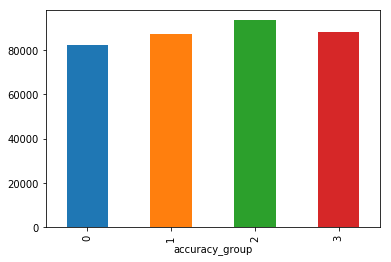

In [161]:
acc_grouped_df.game_time.mean().plot.bar()

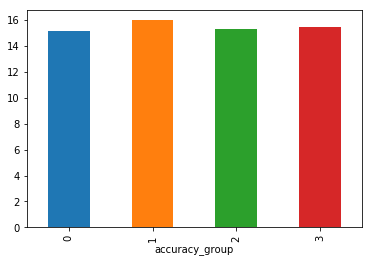

In [162]:
acc_grouped_df.hour.mean().plot.bar()

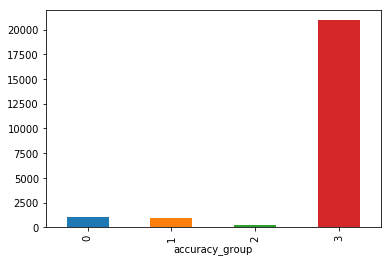

In [163]:
acc_grouped_df.time_since_lastPlay.mean().plot.bar()

This is Awesome to see! it means I potentially created a feature that will be useful in predicting accuracy group. Lets look into this a little more.

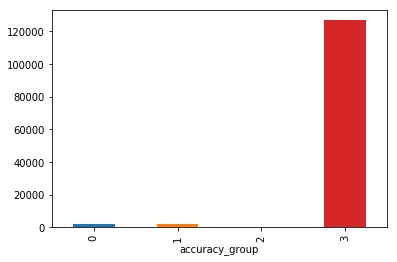

In [164]:
acc_grouped_df.time_since_lastPlay.std().plot.bar()

As you can see the std of the time since last play for accuracy group 3 is is very large. however its nearly none existent for group 2. this could mean a number very close to the mean of accuracy group 2 could be a good indicator.

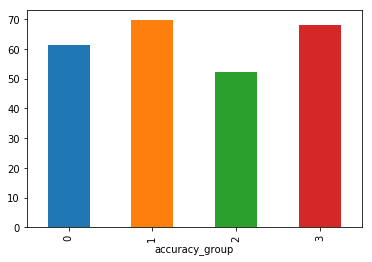

In [165]:
acc_grouped_df.event_count.mean().plot.bar()

,installation_id,event_count,event_code,hour,time_since_lastPlay,game_time,accuracy_group,Magma_World_count,Crystal_World_count,Treetop_World_count,None_World_count,game_count,clip_count,Activity_count,Assessment_count
0,0006a69f,61.807886,3452.519521,9.470043,22.103709,89062.887901,3,0,0,0,0,18887,476,20706,3910
0,0006c192,86.678695,3598.561048,10.788433,769.993060,88522.025210,2,0,0,0,0,10931,510,20502,2448
0,00129856,1.750000,2258.750000,6.250000,822334.093000,20.500000,3,0,0,0,0,0,0,0,68
0,001d0ed0,25.530184,3475.123360,13.753281,5.658326,30571.643045,0,0,0,0,0,2992,323,204,2958
0,00225f67,64.758678,3588.732231,15.282645,1.627560,64426.095868,0,0,0,0,0,6035,170,3587,493
0,00279ac5,77.569372,3440.591763,14.433027,6.981858,138732.873251,0,0,0,0,0,22950,357,19193,17
0,002db7e3,79.212722,3478.184024,19.110947,126.975455,111541.170118,1,0,0,0,0,23834,663,26078,6885
0,003372b0,52.966228,3430.493417,13.023469,49.712051,64811.343446,3,0,0,0,0,16660,459,9146,3434
0,004c2091,20.747604,3270.370607,19.345048,438.645369,31181.638978,0,0,0,0,0,119,357,2499,2346
0,00634433,37.319797,3458.659898,20.000000,3.777730,57172.406091,0,0,0,0,0,1683,119,0,1547


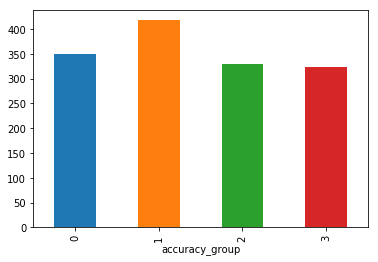

In [173]:
acc_grouped_df.clip_count.mean().plot.bar()
baselineTrain

In [198]:
X_train = baselineTrain.drop(columns = 'accuracy_group')

In [199]:
y_train = baselineTrain.accuracy_group

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score



X_train_dict = X_train.to_dict(orient='records')

vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)

X_train = vec.transform(X_train_dict)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# K-Nearest Neighbors Model
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train_sc, y_train)
y_train_pred = model.predict(X_train_sc)


cohen_kappa_score(y_train, y_train_pred)

0.22596010717475445

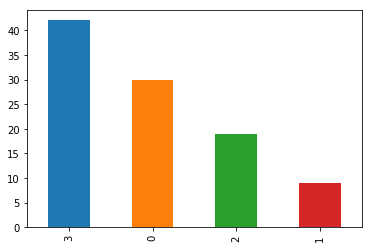

In [186]:
baselineTrain.accuracy_group.value_counts().plot.bar()

In [191]:
baselineTrain[baselineTrain.accuracy_group == 3].size / baselineTrain.size

0.42

In [205]:
y_train.size

100

In [206]:
listofzeros = [0] * 100
guessgroup3 = pd.Series(3, listofzeros)

In [209]:
cohen_kappa_score(y_train, y_train_pred)

0.22596010717475445